# TP TSIA202a - Nelson Roux de Bézieux

In [171]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import matplotlib.widgets as wid
import randproc as rp
import wave
from scipy import linalg as la

Question 1 :

Pour $Z \sim \text{WN}(0, \sigma^2)$, la fonction d'autocovriance est  ${\gamma_Z(h) = \sigma^2 \delta_{0}(h)}$
$Y$ est AR(1) donc sa représentation MA($\infty$) est  $\forall t \in \mathbb{Z}, Y_t = \sum_{k=0}^{+\infty} \phi^k Z_{t-k}$ 
  $$\forall s \leq t, \mathrm{Cov}(Y_s, Y_t) =
  \mathrm{Cov}\left(\sum_{k=0}^{+\infty} \phi^k Z_{s-k}, \sum_{k=0}^{+\infty} \phi^k Z_{t-k}\right) =
  \sigma^2 \sum_{k=0}^{+\infty} \sum_{j=0}^{+\infty} \phi^{k+j} \delta_{s-k, t-j} =
  \sigma^2 \sum_{k=0}^{+\infty} \phi^{k + (t-s+k)} =
  \dfrac{\sigma^2 \phi^{t-s}}{1-\phi^2}$$
  En faisant la même chose pour $t \leq s$, on obitent finalement la formule suivante :
  $$\boxed{\gamma_Y(h) = \dfrac{\sigma^2 \phi^{|h|}}{1-\phi^2}}$$

Processus Harmonique  $X = (X_t)_{t \in \mathbb{Z}} = (A_0 \cos(\lambda_0 t + \phi_0) + Z_t)_{t \in \mathbb{Z}}$ avec $\lambda_0 \in [0, \pi[$ et $\phi_0$ suit une loi uniforme sur $[0, 2\pi]$ indépendante $Z_t$  
  
  $$
  \begin{align}
  \mathrm{Cov}(X_s, X_t) &= \mathrm{Cov}(A_{0} \cos(\lambda_{0} s + \phi_{0}) + Z_s, A_{0} \cos(\lambda_{0} t + \phi_{0}) + Z_t) \\
  &= A_{0}^2 \mathrm{Cov}(\cos(\lambda_{0} s + \phi_{0}), \cos(\lambda_{0} t + \phi_{0})) + \sigma^2 \delta_{s-t} & \phi_{0} \perp \!\!\! \perp Z \\
  &= A_{0}^2 \mathbb{E}\left[ \cos(\lambda_{0} s + \phi_{0})\cos(\lambda_{0} t + \phi_{0}) \right] + \sigma^2 \delta_{s-t} & \forall k, \mathbb{E}\left[ \cos(\lambda_{0} k + \phi_{0})\right] = 0 \,  \\
  &= \dfrac{A_{0}^2}{2} \mathbb{E}\left[ \cos(\lambda_{0} (s-t))\cos(\lambda_{0} (s+t) + 2\phi_{0}) \right] + \sigma^2 \delta_{s-t} \\
  &= \dfrac{A_0^2}{2} \cos(\lambda_{0} (s-t)) + \sigma^2 \delta_{s-t}
  \end{align}
  $$  
  On obtient donc :
  ${\gamma_X(h) = \dfrac{A_{0}^2}{2} \cos(\lambda_{0} h) + \sigma^2 \delta_{0}(h)}$

Partie 2  

$$
\begin{align}
I_n(\lambda) &= \dfrac{1}{2\pi} \sum_{h=-n+1}^{n-1} \gamma_n(h) e^{-i \lambda h} \\
&= \dfrac{1}{2\pi} \sum_{h=-n+1}^{n-1} \dfrac{1}{n} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) e^{-i \lambda h} \\
&= \dfrac{1}{2\pi n} \sum_{h=1}^{n-1} \sum_{t=0}^{n-1-h} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) 2 \cos(\lambda h)
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2   &   \forall h<0, \gamma_n(h) = \gamma_n(|h|) \\
&= \dfrac{1}{2\pi n} \sum_{t=0}^{n-2} \sum_{h=1}^{n-1-t} (X_t - \hat{\mu}_n)(X_{t+h} - \hat{\mu}_n) 2 \cos(\lambda h)
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \sum_{t=0}^{n-2} \sum_{l=t+1}^{n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) 2 \cos(\lambda (l-t))
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2   &   l=h+t \\
&= \dfrac{1}{2\pi n} \sum_{0 \leq t < l \leq n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) (e^{i\lambda(l-t)} + e^{-i\lambda(l-t)})
+ \dfrac{1}{2\pi n} \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \sum_{\substack{0 \leq t,l \leq n-1 \\ t \ne l}} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) e^{-i \lambda (l-t)}
+ \dfrac{1}{2\pi n} \sum_{u=0}^{n-1} (X_u - \hat{\mu}_n)^2 \\
&= \dfrac{1}{2\pi n} \left( \sum_{0 \leq t,l \leq n-1} (X_t - \hat{\mu}_n)(X_{l} - \hat{\mu}_n) e^{-i \lambda (l-t)} \right) \\
&= \dfrac{1}{2\pi n} \left| \sum_{t=0}^{n-1} (X_t - \hat{\mu}_n) e^{-i \lambda t} \right|^2
\end{align}
$$

Le périodograme à un facteur près le carré de la DTFD de la processus auquel on a enlevé sa moyenne empirique

In [137]:
#Constantes : 
H = 20 
n = 2*H - 1 



#Génération des processus
#Bruit blanc 
def generate_whitenoise(n,sigma):
    X = np.random.normal(0,sigma, n) #observations 
    return X
#Processus Harmonique   
def generate_harmonic(n,A_0,lamb):
    z = np.random.uniform(0, np.pi, n)
    w = np.random.normal(0,1,n)
    t = [i for i in range(n)]
    X = [A_0*np.cos(lamb*t[i]+z[i])+ w[i] for i in range(n)] 
    return X

#Processus AR(1)
def generate_AR1(j): 
    z = np.random.normal(0,1,j)
    phi = 0.6
    P = np.array([1.])                 
    Q = np.poly((phi,))
    X = sig.lfilter(P, Q, z)
    return X 

#Periodogram 
def plot_periodogram(L):
    m = 10*n
    mean = np.mean(L)
    M = L - mean 
    I = np.abs(np.fft.fft(M, m))**2 / (2*np.pi*n)
    plt.plot(np.arange(-m//2, m//2)*2*np.pi/I.size, I, c='g')
    plt.title('Periodogram of a the  signal')
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$I_n(\lambda)$')
    
#Covariances 
def plot_covariances(X, gamma_th):
    gamma = acovb(X)
    plt.plot(np.arange(-n, n-1), np.roll(gamma, n), label='empirical', marker='s')
    plt.plot(np.arange(-n, n-1), gamma_th, label='theoretical', marker='.', c = 'g')
    plt.xlabel('h')
    plt.ylabel(r'$\gamma_Z(h)$')
    plt.legend()
    plt.show()



    

In [138]:
def acovb(X=None):
    l = len(X)
    Xc = X - np.mean(X)    
    m = 2 * l - 1
    I = np.abs(np.fft.fft(Xc,m)) ** 2 /  l
    gamma = np.real(np.fft.ifft(I))    
    gamma = gamma[0:l]
    return gamma

<function matplotlib.pyplot.show(close=None, block=None)>

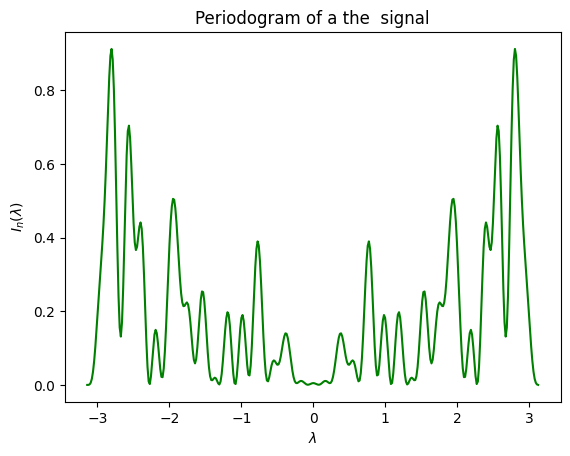

In [139]:
#Pour le signal AR(1)
AR = generate_AR1(n)
plot_periodogram(AR)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

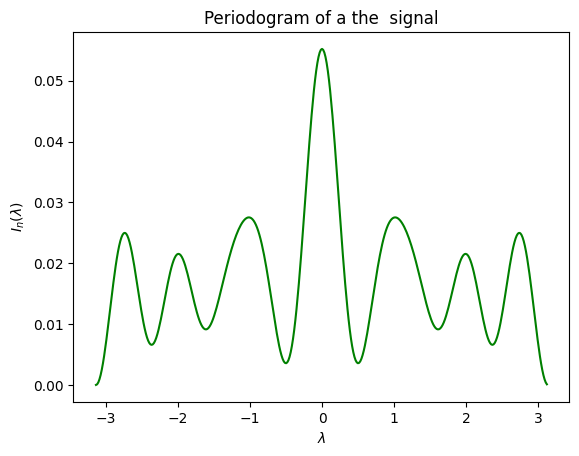

In [140]:
#Pour le bruit blanc
W = generate_whitenoise(10,1)
plot_periodogram(W)
plt.show
#m = 20*n
#mu_white = np.mean(L) #moyenne des observations
#X_white = L - mu_white #on retire cette moyenne à nos échantillons 
#I_white = (1/(2*np.pi*m))*(np.abs(np.fft.fft(X_white,m)))**2 #calcul du carré de la module de la tfd
#a = np.arange(-1/2, 1/2, 1/m) #abcisses
#plt.plot(a,I_white, c = "g") #plot
#plt.show()


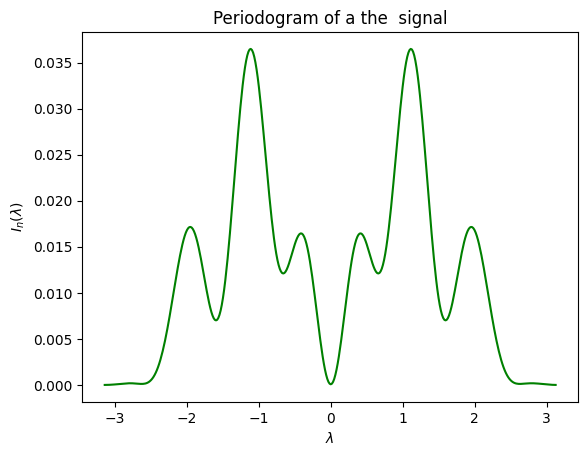

In [141]:
#Pour le processus harmonique
Har = generate_harmonic(10,1,np.pi/3)
plot_periodogram(Har)


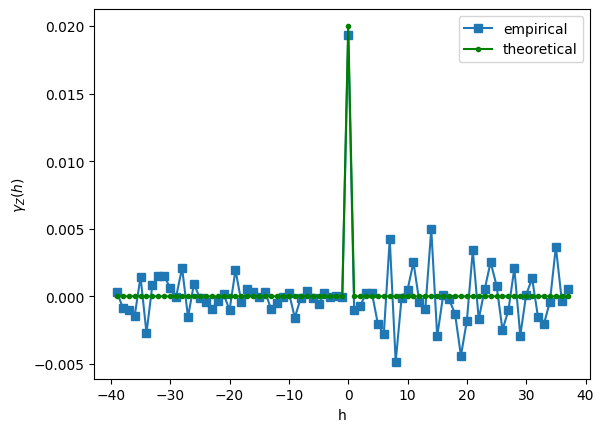

In [155]:
sigma = 1
gamma_th = np.zeros(2*n-1)
gamma_th[n] = 0.02 #ici petit problème de constance que je n'ai pas eu le temps de résoudre mais on devrait avoir gamma_th[0] = 1
plot_covariances(acovb(generate_whitenoise(2*n-1,sigma)), gamma_th)



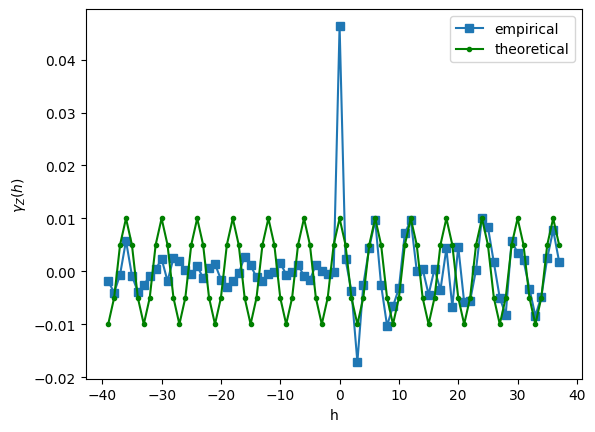

In [159]:
gammah_th = A_0**2/100 * np.cos(np.pi/3 * np.arange(-n, n-1)) #Idem petit probleme de constante 
plot_covariances(acovb(generate_harmonic(2*n-1,A_0,np.pi/3)), gammah_th)

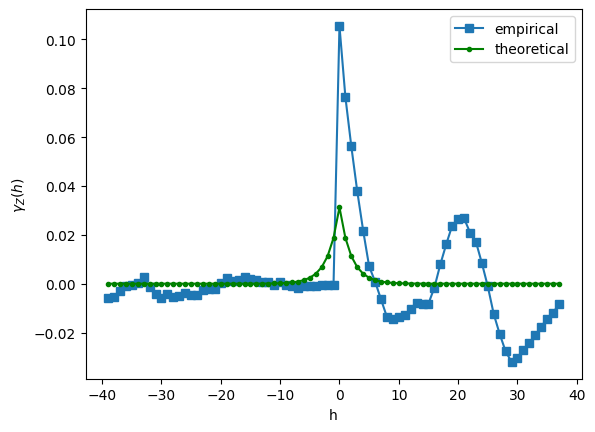

In [167]:
#Pour le processus AR(1)
AR = generate_AR1(n)
phi = 0.6
gamma_Ar_th = (1/(1 - phi**2) * phi**np.abs(np.arange(-n, n-1)))/50 #Idem petit pb de constante
plot_covariances(acovb(generate_AR1(2*n-1)), gamma_Ar_th)


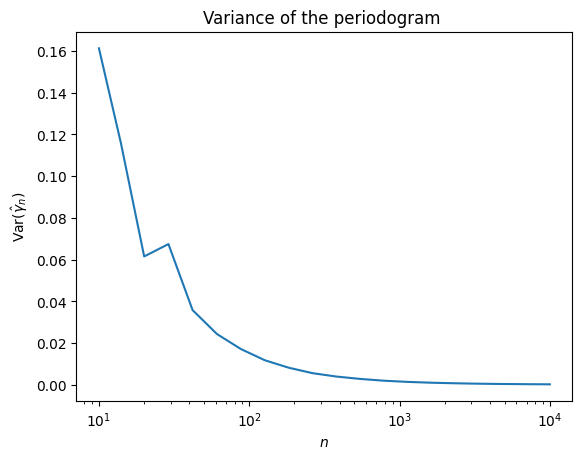

In [168]:
variances = []
for n in np.logspace(1, 4, 20, dtype=int):
    acc = []
    for i in range(50):  # average the variance of the periodogram over many experiences
        X = np.random.normal(0, 1, n)
        gamma = acovb(X)
        var = np.var(gamma)
        acc.append(var)
    variances.append(np.mean(acc))
plt.plot(np.logspace(1, 4, 20, dtype=int), variances)
plt.xscale('log')
plt.title(r'Variance of the periodogram ')
plt.xlabel(r'$n$')
plt.ylabel(r'$\mathrm{Var}(\hat{\gamma}_n)$')
plt.show()

On voit que la variance du périodogramme diminue avec n, ce qui est logique. Plus on regarde le périodogramme longtemps, plus on peut estimer les moments des variables aléatoires de manière précise et donc diminuer la variance de notre périodogramme. 

Exercice 3 : 

Soit $X$ m processus causal, réel, centré AR-($p$) 
Par causalité de $X$ il exixte $(\alpha_k)_{k \in \mathbb{N}}$ such that $X_t = \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}$ (représetation MA($\infty$))

On a donc, pour la $\gamma\$ : 

$\forall h \ge 1, \mathbb{E}(X_{t-h}Z_t) = \mathbb{E}\left[ \left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}\right) Z_t \right] =
\mathrm{Cov}\left(\sum_{k=0}^{+\infty} \alpha_k Z_{t-h-k}, Z_t\right) =
\sum_{k=0}^{+\infty} \alpha_k \mathrm{Cov}(Z_{t-h-k}, Z_t) =
\sum_{k=0}^{+\infty} \alpha_k \delta_{h+k} = 0$

$\forall h \ge 1$,
$$
\gamma(h) = \mathrm{Cov}(X_t, X_{t-h}) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_{t-h}\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_{t-h}) + \mathrm{Cov}(Z_t, X_{t-h}) =
\sum_{k=1}^p \phi_k \gamma(h-k) + \bar{0} =
\sum_{k=1}^p \phi_k \gamma(h-k)
$$

$$
\gamma(0) = \mathrm{Cov}(X_t, X_t) =
\mathrm{Cov}\left(\sum_{k=1}^p \phi_k X_{t-k} + Z_t, X_t\right) =
\sum_{k=1}^p \phi_k \mathrm{Cov}(X_{t-k}, X_t) +  \mathrm{Cov}(Z_t, X_t) =
\sum_{k=1}^p \phi_k \gamma(-k) + \mathrm{Cov}\left(Z_t, \sum_{k=0}^{+\infty} \alpha_k Z_{t-k}\right) =
\sum_{k=1}^p \phi_k \gamma(-k) + \sigma^2
$$

On obtient donc, comme dans le polycopié de cours, la matrice (de Teoplitz) suivante : 

$$
\Gamma_{p+1} =
\begin{bmatrix}
\gamma(0) & \gamma(-1) & \dots & \dots & \gamma(-p) \\
\gamma(1) & \gamma(0) & \ddots & \ddots & \gamma(-p+1) \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \gamma(-1) \\
\gamma(p) & \gamma(p-1) & \dots & \gamma(1) & \gamma(0) 
\end{bmatrix}
=
[\gamma(i-j)]_{i,j \in \{0, \dots, p\}}
$$
which satisfies
$$
\Gamma_{p+1}
\begin{bmatrix}
1 \\
-\phi_1 \\
\vdots \\
\vdots \\
-\phi_p 
\end{bmatrix}
=
\begin{bmatrix}
\sigma^2 \\
0 \\
\vdots \\
\vdots \\
0 
\end{bmatrix}
$$

Partie II : Estimation 

In [199]:
def genAR(p, n, noiseSTD=1):
# Returns    
# X :   Generated AR process 
# phi : coefficients or recurrence equation 
#       X(t) = phi(1)X(t-1)+...+phi(p)X(t-p) + Z(t);
#       Z(t) is WN(0,1).
# p :   Order of AR filter
# n :   Number of output samples
# noiseSTD : STD of the white noise. Default = 1

    # random draw of int(p/2) complex roots inside the unit circle 
    nrc = int(p/2) #% number of complex roots

    # Set the module of the poles in the (0.5 0.999) interval
    rho = .5+0.499*np.sqrt(np.random.random_sample(nrc)) 
    theta = 2*np.pi*np.random.random_sample(nrc)
    zk = rho *np.exp(1.j *theta);
    #
    # Compute transient lenght
    zmax = zk[np.abs(zk)==np.max(np.abs(zk))]
    rhomax = np.abs(zmax)
    tau = -1./np.log(rhomax) 
    transient = int(5*tau)    #  we allow for some room
    
    zk = np.concatenate((zk, np.conjugate(zk)))
    if np.remainder(p,2): # we need to add one real positive root in the interval (0,1)
        realRoot = np.random.random_sample()
        zk =  np.concatenate(([realRoot], zk))
                                      
    coeff = np.poly(zk) # coefficients of polynomial p(z) = prod_k( z-z_k);
    coeff = np.real(coeff) # remove possible imag residuals due to limited precision
    
    
    phi = -coeff[1:];
                
    # White noise generation. Lenght = n+transient
    noise = noiseSTD*np.random.randn(n+transient)

    # AR signal generation
    X =  sig.lfilter([1], coeff, noise)
    
    # Removing the transient
    X=X[transient:]

    return X, phi

In [200]:
#Calcul de processus AR(4)
n = 1000
p = 4
std = 1
X, phi = genAR(p, n, std)
coeff = np.concatenate(([1], -phi))
gamma = acovb(X)
Gamma_hat = la.toeplitz(gamma[0:p+1])

v = np.zeros(p+1)
v[0] = 1
v = np.matmul(la.inv(Gamma_hat), v)

In [201]:
print('Estimation de la variance :', 1/v[0])

Estimation de la variance : 1.0421067288426924


In [206]:
coeff_e = 1/v[0] * v
coeff[0] = 1

In [207]:
#Coefficients : 
print(f"vrai coeffs:, {coeff}")

vrai coeffs:, [ 1.         -0.42523292  0.43635399 -0.21566385  0.74689612]


In [208]:
#Estimation des coefficients :
print(f"coeffs,{coeff_e}")

coeffs,[ 1.         -0.46187211  0.44131104 -0.20008244  0.72699292]


In [212]:
err = coeff - coeff_e
rel_err =  np.linalg.norm(err)/np.linalg.norm(coeff)
print(f"erreur : {err}")
print(np.mean(err))
print(rel_err)

erreur : [ 0.          0.03663919 -0.00495705 -0.0155814   0.0199032 ]
0.007200787933955871
0.03186457643403396


Part III : Speech processing :

Je n'ai pas eu le temps de traiter cette partie 